`Pandas` veri analitiği alanında, özellikle veri işleme ve analizi için sıklıkla kullanılan bir Python paketi. `Pandas` paketi seri (`Series`) ve veri çerçevesi (`DataFrame`) isimli iki veri yapısının üzerine kurulmuş. Bunlardan serileri tek boyutlu diziler, veri çerçevelerini ise iki boyutlu matrisler (ya da her kolonu bir seriden oluşan yapı) gibi düşünebiliriz. Ancak `Pandas` paketi liste ve matrislerden farklı işlevler sunuyor. Örnek olarak SQL tablolarında kullanılan tablo birleştirme (join) gibi işlemleri de `Pandas` sayesinde yapmak mümkün.

`Pandas` paketiyle yapabileceğimiz temel işlemleri aşağıda bulabilirsiniz:
* Veriyi çeşitli formatlardaki dosyalardan okutmak ve dosyalara yazdırmak mümkün. `Pandas`, metin ve Excel dosyalarının yanında, Stata ve SAS gibi yazılımların formatlarını da destekliyor. 
* Eksik değerleri doldurmak/çıkarmak için yöntemler içeriyor.
* Çeşitli veri çerçevelerini birleştirmek (SQL dilindeki JOIN ve MERGE işlemleri) mümkün.
* Farklı türlerde grafikler çizdirebiliriz. 
* Groupby fonksiyonu sayesinde veriyi gruplara bölerek, yapacağımız işlemlerle (toplama, sayma, ortalama alma gibi) özetleyebiliriz. `Groupby` konusunda yazdığımız detaylı bir yazıya [linkten](http://www.veridefteri.com/2017/10/30/groupby/) erişebilirsiniz. 

`Pandas` ile ilgili yazı serisinin ilk bölümünde seri veri yapısını inceleyeceğiz. Burada kullandığımız yöntemlerin çoğu veri çerçeveleri için de geçerli olacaktır. Pandas serilerine giriş amacıyla IMF'nin gayrisafi yurt içi hasıla verisini kullanacağız. Detaylı veri setine [linkten](http://www.imf.org/external/pubs/ft/weo/2017/02/weodata/download.aspx) erişebilirsiniz. Ben küçük bir örneklemle çalıştığım için veriyi okutmayla ilgili kısımlara, veri çerçeveleriyle ilgili yazıda değineceğim.

# Seriler

Seri, etiketli verilerden oluşan tek boyutlu bir veri yapısıdır. Etiket değerlerine indeks denir. Verinin kendisi sayılar, dizeler ya da başka Python objelerinden oluşabilir. Serileri oluşturmak için listeler, sıralı diziler ya da sözlükler kullanılabilir. 10 ülkenin 2017 yılının GSYİH değerlerinden oluşan bir seri oluşturalım. Dikkat etmemiz gereken nokta indeks ve verinin aynı boyutta olması. Bunu sağlayamazsak hata mesajı alacağız.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Pandas paketini yükleyelim
import pandas as pd 
import numpy as np

#GSYİH değeri en yüksek olan 10 ülkenin değerlerini kullanacağız.
gdp_data_2017 = [19362.13, 11937.56, 4884.49, 3651.87, 2574.81, 2565.05, 2439.01, 2080.92, 1921.14, 1640.39]

#Seriyi oluşturalım. İndeks değerini vermediğimizde, Pandas 0'dan başlayarak veriyi indeksler.
gdp_2017 = pd.Series(gdp_data_2017)
print(gdp_2017)

0    19362.13
1    11937.56
2     4884.49
3     3651.87
4     2574.81
5     2565.05
6     2439.01
7     2080.92
8     1921.14
9     1640.39
dtype: float64


İndeks değeri vermediğimizde seri pek anlamlı durmuyor. İndeks değerlerini bir liste olarak sonradan atayabilir ya da seriyi oluştururken belirtebiliriz.

In [2]:
# İndeks değerlerini içeren listeyi oluşturalım.
gdp_index_2017 = ['ABD', 'Çin', 'Japonya', 'Almanya', 'Fransa', 'Birleşik Krallık', 'Hindistan', 'Brezilya', 'İtalya', 'Kanada']

# Serinin indeks değerini oluşturduğumuz listeye eşitleyelim.
gdp_2017.index = gdp_index_2017
print(gdp_2017)

# Seriyi oluştururken indeks değerlerini belirtmek için aşağıdaki satırı kullanabiliriz.
#gdp_2017 = pd.Series(gdp_data_2017, index = gdp_index_2017)

ABD                 19362.13
Çin                 11937.56
Japonya              4884.49
Almanya              3651.87
Fransa               2574.81
Birleşik Krallık     2565.05
Hindistan            2439.01
Brezilya             2080.92
İtalya               1921.14
Kanada               1640.39
dtype: float64


2016 yılı için de aşağıdaki gibi sözlük veri yapısını kullanarak bir seri oluşturalım. Bu sefer seriyi oluşturmak için bir sözlük kullanacağız. 

In [3]:
d = {'ABD':18624.45,
'Çin':11232.11,
'Japonya':4936.54,
'Almanya':3479.23,
'Fransa':2466.47,
'Birleşik Krallık':2629.19,
'Hindistan':2263.79,
'Brezilya':1798.62,
'İtalya':1850.74,
'Kanada':1529.76}

gdp_2016 = pd.Series(d)

print(gdp_2016)

ABD                 18624.45
Çin                 11232.11
Japonya              4936.54
Almanya              3479.23
Fransa               2466.47
Birleşik Krallık     2629.19
Hindistan            2263.79
Brezilya             1798.62
İtalya               1850.74
Kanada               1529.76
dtype: float64


Sözlük yapısıyla girdiğimiz verilerin sırasının değiştiğini, alfabetik olarak sıralandığını görüyoruz. `Pandas` indeksin değerine göre işlem yaptığı için bunun bir önemi yok. 

Veri kümesini genişletmek istediğimizde iki seçeneğimiz var:
* Köşeli parantez ile veriyi girebiliriz.
* Oluşturduğumuz ikinci bir seriyi `append` fonksiyonuyla ilk seriye ekleyebiliriz. 

Köşeli parantezle girdiğimiz veri o indekse sahip bütün girdileri sağladığımız değere eşitler. Eğer o indekse sahip bir değer yoksa seriye yeni bir eleman ekler.

In [4]:
# Kore'nin GSYİH değerini giriyoruz. 
# Seride 'Korea' indeksine sahip bir eleman olmadığı için seriye yeni bir eleman eklenecek.
gdp_2016['Kore'] = 1411.04

print(gdp_2016)

#Aşağıdaki satırı eklemiş olsaydık yeni bir gözlem eklemek yerine var olan gözlemi değiştirmiş olacaktık.
#gdp['China'] = 1411.04 

ABD                 18624.45
Çin                 11232.11
Japonya              4936.54
Almanya              3479.23
Fransa               2466.47
Birleşik Krallık     2629.19
Hindistan            2263.79
Brezilya             1798.62
İtalya               1850.74
Kanada               1529.76
Kore                 1411.04
dtype: float64


`append` fonksiyonunu kullandığımızda ise bir seri, diğerinin sonuna eklenir. Burada dikkat etmemiz gereken nokta aynı indekse sahip elemanlar varsa bunların çoğullanacak olmasıdır. Sözlüğün içinde aynı indekse sahip girdiler varsa en sonuncusu alınır. Aşağıdaki örnekte Meksika'nın tek girdisi olmasına rağmen ABD'nin iki girdisi olduğunu görüyoruz.

In [5]:
d1 = {'Rusya' : 1365.865,
'Avustralya' : 1229.938,
'İspanya' : 1193.556,
'Meksika' : np.NaN,
'Meksika' : 1,
'Meksika' : 1046.925,
'ABD' : 0
}

gdp_2016 = gdp_2016.append(pd.Series(d1))
print(gdp_2016)

ABD                 18624.450
Çin                 11232.110
Japonya              4936.540
Almanya              3479.230
Fransa               2466.470
Birleşik Krallık     2629.190
Hindistan            2263.790
Brezilya             1798.620
İtalya               1850.740
Kanada               1529.760
Kore                 1411.040
Rusya                1365.865
Avustralya           1229.938
İspanya              1193.556
Meksika              1046.925
ABD                     0.000
dtype: float64


# Temel Metotlar ve Erişim

Seriler veri ve indeks değerlerinden oluşur. `values` ve `index` metotlarıyla bunlara erişmek mümkündür. 

Yazının geri kalanında, kimi çıktılarda kullanılan biçimlendirmeyi (`format`)  öğrenmek için Kaan'ın [dize biçimlendirme](http://www.veridefteri.com/2018/02/23/python-programlamaya-giris-16-dize-bicimlendirme/) yazısını inceleyebilirsiniz. 

In [6]:
print('GSYİH değerleri: {}'.format(gdp_2017.values))
print('İndeks değerleri: {}'.format(gdp_2017.index))

GSYİH değerleri: [19362.13 11937.56  4884.49  3651.87  2574.81  2565.05  2439.01  2080.92
  1921.14  1640.39]
İndeks değerleri: Index(['ABD', 'Çin', 'Japonya', 'Almanya', 'Fransa', 'Birleşik Krallık',
       'Hindistan', 'Brezilya', 'İtalya', 'Kanada'],
      dtype='object')


`ndim` boyutu, `shape` şekli, `size` ise serinin uzunluğunu verir.

In [7]:
print('Boyut: {}'.format(gdp_2017.ndim))
print('Şekil: {}'.format(gdp_2017.shape))
print('Uzunluk: {}'.format(gdp_2017.size))

Boyut: 1
Şekil: (10,)
Uzunluk: 10


Serideki değerlerin ve indeksin adını da belirtmek mümkün. Bunun için `name` metodunu kullanabiliriz. İndeksin ülkeler, verinin de GSYİH olduğunu belirtelim.

In [8]:
gdp_2017.name = 'GSYİH'
gdp_2017.index.name = 'Ülkeler'
print(gdp_2017)

Ülkeler
ABD                 19362.13
Çin                 11937.56
Japonya              4884.49
Almanya              3651.87
Fransa               2574.81
Birleşik Krallık     2565.05
Hindistan            2439.01
Brezilya             2080.92
İtalya               1921.14
Kanada               1640.39
Name: GSYİH, dtype: float64


Veriyle ilgili özet bilgiler almak ve serinin içeriğine bakmak için `describe` ve `head` fonksiyonlarını kullanabiliriz. `head` fonksiyonuna sağlayacağınız bir tamsayı, kaç satırlık veriye ulaşacağınızı belirleyecektir (varsayılan değer 5).

In [9]:
print('Verinin özeti:')
print(gdp_2017.describe())
print('Serinin ilk beş satırı:')
print(gdp_2017.head())

Verinin özeti:
count       10.000000
mean      5305.737000
std       5801.849771
min       1640.390000
25%       2170.442500
50%       2569.930000
75%       4576.335000
max      19362.130000
Name: GSYİH, dtype: float64
Serinin ilk beş satırı:
Ülkeler
ABD        19362.13
Çin        11937.56
Japonya     4884.49
Almanya     3651.87
Fransa      2574.81
Name: GSYİH, dtype: float64


Erişim için indeksin değerini ya da sırasını verebiliriz. Örnek olarak Çin'in ve 5. sıradaki (indeksi 4 olan) ülkenin GSYİH değerlerine bakalım. Sıra numarasıyla eriştiğimizde indeks değerini ayrıca kontrol etmemiz gerekebilir. Seriyi sözlük kullanarak oluşturduğumuzda girdilerin sırasının değiştiğini hatırlayalım.

In [10]:
print('gdp_2017[\'Çin\']: {}'.format(gdp_2017['Çin']))
print('gdp_2017[4]: {}'.format(gdp_2017[4]))

gdp_2017['Çin']: 11937.56
gdp_2017[4]: 2574.81


[Sıralı nesnelerdeki dilimleme](http://www.veridefteri.com/2018/01/26/python-programlamaya-giris-sirali-nesnelerle-islemler/) işlemleri `Pandas` serilerinde de kullanılabilir. Dilimleme için iki seçenek var: indeksin sırası ve kendisi. `iloc` indeksin sırasıyla, `loc` indeksin kendisiyle işlem yapmaya olanak verir. `loc` metotunda ilk eleman da son eleman da dilimlemeye dahil edilir. İlk 3 elemana (`iloc`) ve Japonya ile İtalya arasındaki elemanlara (`loc`) erişelim.

In [11]:
print('gdp_2017.iloc[:3]:\n{}'.format(gdp_2017.iloc[:3]))
print('gdp_2017.loc[\'Japonya\':\'İtalya\']:\n{}'.format(gdp_2017.loc['Japonya':'İtalya']))

gdp_2017.iloc[:3]:
Ülkeler
ABD        19362.13
Çin        11937.56
Japonya     4884.49
Name: GSYİH, dtype: float64
gdp_2017.loc['Japonya':'İtalya']:
Ülkeler
Japonya             4884.49
Almanya             3651.87
Fransa              2574.81
Birleşik Krallık    2565.05
Hindistan           2439.01
Brezilya            2080.92
İtalya              1921.14
Name: GSYİH, dtype: float64


`gdp_2016` tablosunda indeksi ABD olan iki girdi var. Şimdi bunlardan birini silelim. ABD'nin GSYİH değerini 18624.450'ye eşitleyerek değerleri `drop_duplicate` fonksiyonuyla tekilleştirelim. 

In [12]:
# Aşağıdaki satır indeksi ABD olan bütün girdileri değiştirir.
gdp_2016['ABD'] = 18624.450
print('Tekilleştirme öncesi')
print(gdp_2016)
# Aşağıdaki satır aynı olan değerleri tekilleştirir. 
# inplace = True sayesinde işlemi serinin kendisi üzerinde yapıyoruz.
gdp_2016.drop_duplicates(inplace = True)
print('Tekilleştirme sonrası')
print(gdp_2016)

Tekilleştirme öncesi
ABD                 18624.450
Çin                 11232.110
Japonya              4936.540
Almanya              3479.230
Fransa               2466.470
Birleşik Krallık     2629.190
Hindistan            2263.790
Brezilya             1798.620
İtalya               1850.740
Kanada               1529.760
Kore                 1411.040
Rusya                1365.865
Avustralya           1229.938
İspanya              1193.556
Meksika              1046.925
ABD                 18624.450
dtype: float64
Tekilleştirme sonrası
ABD                 18624.450
Çin                 11232.110
Japonya              4936.540
Almanya              3479.230
Fransa               2466.470
Birleşik Krallık     2629.190
Hindistan            2263.790
Brezilya             1798.620
İtalya               1850.740
Kanada               1529.760
Kore                 1411.040
Rusya                1365.865
Avustralya           1229.938
İspanya              1193.556
Meksika              1046.925
dtype: float

Tek bir ülkeyi silmek için `drop` fonksiyonuna indeks değerini vermemiz yeterli.

In [13]:
gdp_2016.drop('Kanada', inplace = True)
print(gdp_2016)

ABD                 18624.450
Çin                 11232.110
Japonya              4936.540
Almanya              3479.230
Fransa               2466.470
Birleşik Krallık     2629.190
Hindistan            2263.790
Brezilya             1798.620
İtalya               1850.740
Kore                 1411.040
Rusya                1365.865
Avustralya           1229.938
İspanya              1193.556
Meksika              1046.925
dtype: float64


`drop` fonksiyonuyla birden fazla değer de silebiliriz. Örnek olarak Kore ile İspanya arasındaki bütün değerleri silelim. `drop` fonksiyonu indeks değerleriyle işlem yaptığı için, Kore ile İspanya arasındaki indeks değerlerini kullanacak.

In [14]:
gdp_2016.drop(gdp_2016.loc['Kore' : 'İspanya'].index, inplace = True)
print(gdp_2016)

ABD                 18624.450
Çin                 11232.110
Japonya              4936.540
Almanya              3479.230
Fransa               2466.470
Birleşik Krallık     2629.190
Hindistan            2263.790
Brezilya             1798.620
İtalya               1850.740
Meksika              1046.925
dtype: float64


# Grafikler

`Pandas`, `matplotlib` paketini kullanarak grafik çizdirmeye de izin veriyor. Bu amaçla `plot` fonksiyonunu kullanabiliriz. Grafiğin tarzını belirtmek için de `kind` argümanını kullanabiliriz. Kind argümanı histogram (`hist`), pasta grafiği (`pie`) ya da çizgi grafiği (`line`) gibi temel grafik çeşitlerini destekliyor. İstanbul'un yıl içindeki sıcaklığını (`line`) ve 2017 yılı için GSYİH dağılımını (`pie`) görselleştirelim.

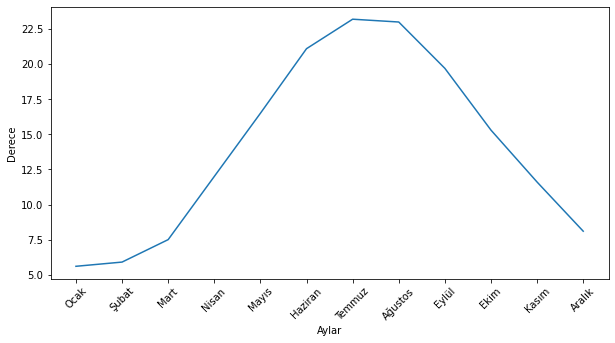

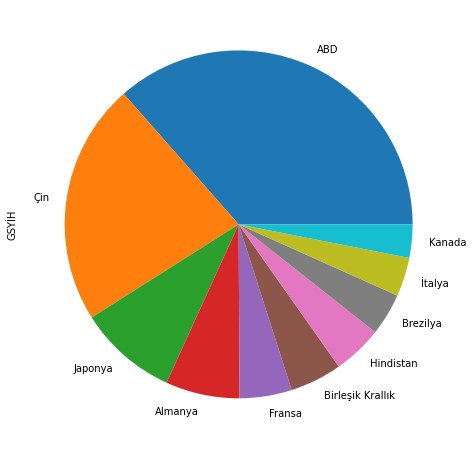

In [15]:
"""
# Sıcaklık verisini aşağıdaki kodu kullanarak elde ettim. Daha sonra ay isimlerini Türkçeye çevirdim
# Pandas altındaki okuma ve yazma fonksiyonlarına ileriki yazılarda değineceğiz.

temp = pd.read_html('http://www.yr.no/place/Turkey/Istanbul/Istanbul/statistics.html', header = 1, index_col=0) 
temp_ist = pd.Series(temp[1]['Normal'], index= temp[1].index.values)
temp_ist = temp_ist.astype(str).str[:-2].astype(np.float)
"""

temp_ist = pd.Series([5.6, 5.9, 7.5, 12., 16.5, 21.1, 23.2, 23., 19.7, 15.3, 11.6, 8.1], 
                     index = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs','Haziran', 
                              'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'])
temp_ist.name = 'Sıcaklık'
temp_ist.index.name = 'Aylar'
plt.figure(figsize= (10,5))
# Çizgi grafiği çizdirelim.
temp_ist.plot(kind = 'line', xticks=np.arange(0,12), rot = 45)
plt.ylabel('Derece')
plt.show()

gdp_2017.name = 'GSYİH'
plt.figure(figsize= (8,8))
# Pasta grafiği çizdirelim.
gdp_2017.plot(kind = 'pie')
plt.show()

# İşlemler

Seriler üzerinde dört işlem yapmak mümkündür. Yaptığımız işlemlerde sadece aynı indekse sahip elemanlar bu işlemlerden etkilenir. İşlem yaparken eksik olan gözlemler ya da bir seride bulunmayan gözlemler diğer serilerde olsa bile `NaN` değerini alır. Bunu engellemek ve eksik olan değerleri doldurmak istiyorsanız işlemlerle ilgili fonksiyonları (`add`, `subtract`, `divide`, `multiply`) kullanabilirsiniz. `fill_value` parametresiyle eksik değerleri değiştirmek mümkün. Ancak iki seride de bulunmayan değerler yine `NaN` değerini alacaktır.

In [16]:
d1 = {'a' : 1, 'b' : 2,'c' : 6, 'f' : np.NaN}
d2 = {'a' : 4, 'b' : 3.2, 'd' : 7, 'f' : np.NaN}

s1 = pd.Series(d1)
s2 = pd.Series(d2)
print(s1 + s2)
print(s1 * s2)
print(s1.multiply(s2, fill_value=1))

a    5.0
b    5.2
c    NaN
d    NaN
f    NaN
dtype: float64
a    4.0
b    6.4
c    NaN
d    NaN
f    NaN
dtype: float64
a    4.0
b    6.4
c    6.0
d    7.0
f    NaN
dtype: float64


Aynı indekse sahip birden fazla değer varsa yapılan işlemler o indekse ait bütün değerler üzerinden yapılır. Aşağıdaki örnekte iki seride de `a` indeksine sahip iki değer var (Birinci seride 1 ve 5, ikinci seride 4 ve 5). Serileri topladığımızda `a` indeksine ait dört değer görüyoruz. 

In [17]:
d1 = {'a' : 1, 'b' : 2,'c' : 6}
d2 = {'a' : 4, 'b' : 3.2, 'd' : 7}

d3 = {'a' : 5}
s1 = pd.Series(d1)
s2 = pd.Series(d2)
s1 = s1.append(pd.Series(d3))
s2 = s2.append(pd.Series(d3))

print(s1 + s2)

a     5.0
a     6.0
a     9.0
a    10.0
b     5.2
c     NaN
d     NaN
dtype: float64


Pandas altında yapacağınız işlemler indekse bağlı olduğu için indekslerin çoklanması ve bunun sonuçları konusunda dikkat etmeniz gerekli.

# Zaman Serileri

Serilerin indeks değerlerini zamana çevirerek zaman serilerini elde edebiliriz. Ocak 2017'de her saat başında bir zar atıp bunun değerlerinden oluşan bir zaman serisi oluşturalım. Bunun için 1 Ocak ile 31 Ocak arasındaki saat dilimlerine ihtiyacımız olacak. Saat dilimlerini oluşturmak için `date_range` fonksiyonunu kullanabiliriz. 31 Ocak 2017 tarihini verirken saati belirtmezsek günün başlangıcını kabul ettiğinden (00:00) saati 23:59 olarak belirtelim. `freq` argümanı sıklığı (frekansı) belirtir. Sıklığı bir saat olarak belirlediğimiz için 'H' değerini kullanıyoruz.

In [18]:
#Her saat için bir indeks oluşturuyoruz.
ts = pd.date_range('1/1/2017', end = '31/1/2017 23:59:00', freq= 'H')

#Bu indekse sahip girdiler için zar atalım.
zar = pd.Series(np.random.randint(1,7,len(ts)), index= ts )

print(zar.head())
print(zar.tail())

2017-01-01 00:00:00    2
2017-01-01 01:00:00    1
2017-01-01 02:00:00    5
2017-01-01 03:00:00    4
2017-01-01 04:00:00    2
Freq: H, dtype: int32
2017-01-31 19:00:00    4
2017-01-31 20:00:00    4
2017-01-31 21:00:00    4
2017-01-31 22:00:00    3
2017-01-31 23:00:00    4
Freq: H, dtype: int32


Attığımız ilk 100 zarı çizgi grafiği olarak gösterelim.

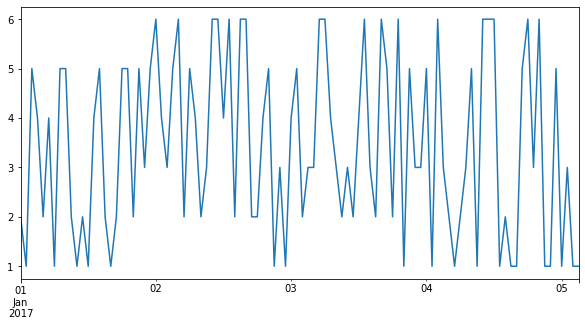

In [19]:
plt.figure(figsize = ( 10,5))
zar.head(100).plot()
plt.show()

Erişim için tarih vererek (indeks değerlerine uygun olacak şekilde), istediğimiz zaman aralığındaki değerleri görebiliriz.

In [20]:
#1 Ocak tarihine ait gözlemler
print(zar['2017-01-01'])

#1 Ocak 13:00:00 ile 16:30:00 arasındaki gözlemler
print(zar['2017-01-01 13:00:00' : '2017-01-01 16:30:00'])

2017-01-01 00:00:00    2
2017-01-01 01:00:00    1
2017-01-01 02:00:00    5
2017-01-01 03:00:00    4
2017-01-01 04:00:00    2
2017-01-01 05:00:00    4
2017-01-01 06:00:00    1
2017-01-01 07:00:00    5
2017-01-01 08:00:00    5
2017-01-01 09:00:00    2
2017-01-01 10:00:00    1
2017-01-01 11:00:00    2
2017-01-01 12:00:00    1
2017-01-01 13:00:00    4
2017-01-01 14:00:00    5
2017-01-01 15:00:00    2
2017-01-01 16:00:00    1
2017-01-01 17:00:00    2
2017-01-01 18:00:00    5
2017-01-01 19:00:00    5
2017-01-01 20:00:00    2
2017-01-01 21:00:00    5
2017-01-01 22:00:00    3
2017-01-01 23:00:00    5
Freq: H, dtype: int32
2017-01-01 13:00:00    4
2017-01-01 14:00:00    5
2017-01-01 15:00:00    2
2017-01-01 16:00:00    1
Freq: H, dtype: int32


Zaman serilerinin bir avantajı veriyi istediğimiz sıklıkta yeniden şekillendirebilmemiz. Örnek olarak 6 saatlik toplamlara ya da günlük ortalamaya bakabiliriz. İşlemler sonucunda elde edeceğimiz seriler için önceden bahsettiğimiz `Pandas` fonksiyonlarını kullanabiliriz.

2017-01-01 00:00:00    18
2017-01-01 06:00:00    16
2017-01-01 12:00:00    15
2017-01-01 18:00:00    25
2017-01-02 00:00:00    26
Freq: 6H, dtype: int32
2017-01-01    3.083333
2017-01-02    3.916667
2017-01-03    3.708333
2017-01-04    3.291667
2017-01-05    2.750000
Freq: D, dtype: float64


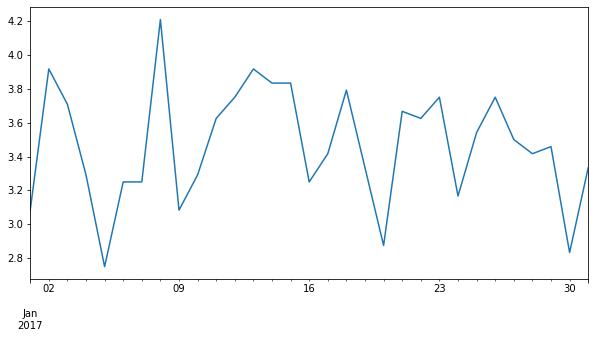

En şanslı olduğumuz gün: 2017-01-08 00:00:00, zarların ortalaması: 4.208333333333333


In [21]:
# 6 saatlik toplamlara bakalım.
zar1 = zar.resample('6H').sum()
print(zar1.head())

# Günlük ortalamaya bakalım.
zar2 = zar.resample('D').mean()
print(zar2.head())

# Günlük ortalamaları çizgi grafiği biçiminde çizdirelim.
plt.figure(figsize=(10,5))
zar2.plot(kind = 'line')
plt.show()
print('En şanslı olduğumuz gün: {}, zarların ortalaması: {}'.format(zar2.idxmax(), zar2[zar2.idxmax()]))

# Veri Çerçeveleri

Seriler tek boyutlu bir veri yapısıyken, veri çerçevelerini her sütunu bir seriden oluşan iki boyutlu bir matris olarak düşünebiliriz. Serilerde bahsettiğimiz birçok yöntemi veri çerçevelerinde de kullanmak mümkün. Ayrıca SQL tablolarında kullanılan tablo birleştirme (`JOIN`) gibi işlemleri de `Pandas` ile yapmak mümkün.

Veri çerçevelerini birden fazla serinin bir araya gelmiş hali olarak düşünebiliriz. Veri çerçeveleri de seriler gibi etiketli bir veri yapısıdır, ancak serilerden farkı iki boyutlu olmasıdır. Serilerdeki gibi etiket değerlerine indeks (`index`) denir. Veri çerçeveleri `index` alanının yanında `columns` alanını da içeriyor. `columns` sütunların isimlerini içeren bir sıralı nesne. 

Veri çerçevesi oluşturmak için serileri kullanmak mümkün. [Linkten](http://www.imf.org/external/pubs/ft/weo/2017/02/weodata/download.aspx) erişebileceğiniz IMF'nin gayrisafi yurt içi hasıla verisi ile ilk denemeyi yapabiliriz. 2016 ve 2017 yılları için serileri anlattığımız yazıdaki veri kümelerini oluşturalım.



In [22]:
# Pandas paketini yükleyelim
import pandas as pd 
import numpy as np

# GSYİH değeri en yüksek olan 10 ülkenin değerlerini kullanacağız.
gdp_data_2017 = [19362.13, 11937.56, 4884.49, 3651.87, 2574.81, 2565.05, 2439.01, 
                 2080.92, 1921.14, 1640.39]
# İndeks değerlerini içeren listeyi oluşturalım.
gdp_index_2017 = ['ABD', 'Çin', 'Japonya', 'Almanya', 'Fransa', 
                  'Birleşik Krallık', 'Hindistan', 'Brezilya', 'İtalya', 'Kanada']

# Seriyi oluşturalım. İndeks değerini vermediğimizde, Pandas 0'dan başlayarak veriyi indeksler.
gdp_2017 = pd.Series(gdp_data_2017, index = gdp_index_2017, name = 'GDP_2017')

# Aynı işlemi 2016 yılı için yapalım.
d = {'ABD':18624.45,
'Çin':11232.11,
'Japonya':4936.54,
'Almanya':3479.23,
'Fransa':2466.47,
'Birleşik Krallık':2629.19,
'Hindistan':2263.79,
'Brezilya':1798.62,
'İtalya':1850.74,
'Kanada':1529.76,
'Kore':1411.04}

gdp_2016 = pd.Series(d, name = 'GDP_2016')

print(gdp_2016)
print(gdp_2017)

ABD                 18624.45
Çin                 11232.11
Japonya              4936.54
Almanya              3479.23
Fransa               2466.47
Birleşik Krallık     2629.19
Hindistan            2263.79
Brezilya             1798.62
İtalya               1850.74
Kanada               1529.76
Kore                 1411.04
Name: GDP_2016, dtype: float64
ABD                 19362.13
Çin                 11937.56
Japonya              4884.49
Almanya              3651.87
Fransa               2574.81
Birleşik Krallık     2565.05
Hindistan            2439.01
Brezilya             2080.92
İtalya               1921.14
Kanada               1640.39
Name: GDP_2017, dtype: float64


Oluşturduğumuz serileri birleştirmek için iki yol kullanacağız. Bunlardan biri `pandas` altındaki `concat` fonksiyonu, diğeri ise serilerden oluşan bir sözlük tanımlamak olacak. 

`concat` fonksiyonunu kullanırken sütunların isimlerini ayrıca belirtmemize gerek yok. Bunun yerine serilerin `name` alanı sütun isimleri olarak atanıyor. Bir seride olup diğerinde olmayan değerler (Kore gibi) `NaN` değeriyle gösterilir.

In [23]:
df = pd.concat([gdp_2017, gdp_2016], axis = 1)
print(df)

                  GDP_2017  GDP_2016
ABD               19362.13  18624.45
Çin               11937.56  11232.11
Japonya            4884.49   4936.54
Almanya            3651.87   3479.23
Fransa             2574.81   2466.47
Birleşik Krallık   2565.05   2629.19
Hindistan          2439.01   2263.79
Brezilya           2080.92   1798.62
İtalya             1921.14   1850.74
Kanada             1640.39   1529.76
Kore                   NaN   1411.04


Veri çerçevesindeki değerlerin serilerdeki yerinden bağımsız olarak indeks alanına göre eşleştirildiğini görüyoruz.

Aşağıdaki örnekte, veri çerçevesini serilerden oluşan bir sözlük yardımıyla oluşturuyoruz. Sözlüğün anahtarı sütunun ismine atanır.

In [24]:
d = {'2017' : gdp_2017,
     '2016' : gdp_2016}

df = pd.DataFrame(d)
print(df)

                      2017      2016
ABD               19362.13  18624.45
Almanya            3651.87   3479.23
Birleşik Krallık   2565.05   2629.19
Brezilya           2080.92   1798.62
Fransa             2574.81   2466.47
Hindistan          2439.01   2263.79
Japonya            4884.49   4936.54
Kanada             1640.39   1529.76
Kore                   NaN   1411.04
Çin               11937.56  11232.11
İtalya             1921.14   1850.74


Ondalık işaretinin değiştiğini görebilirsiniz.

Sözlük listeleri de veri çerçevesi oluşturmak için kullanılabilir. Aşağıdaki örnekteki listedeki her bir sözlük bir ülkenin GSYİH değerine denk geliyor. Hangi ülkeler olduğunu ise veri çerçevesini oluştururken söylüyoruz. Belirtmediğimiz değerler de `NaN` değerini alıyor.

In [25]:
data = [{'GDP_2016':3651.87, 'GDP_2017': 3479.23}, {'GDP_2016' : 2466.47}]
df = pd.DataFrame(data, index = ['Almanya', 'Fransa'])
print(df)

         GDP_2016  GDP_2017
Almanya   3651.87   3479.23
Fransa    2466.47       NaN


Veri çerçevelerinin matrisler gibi iki boyutlu bir veri yapısı olduğundan bahsetmiştik. Matrisler de veri çerçeveleri oluşturmak için kullanılabilir.

In [26]:
# 2x2'lik rassal sayılardan oluşan bir matris oluşturalım.
data = np.random.rand(2,2)
# Index ve columns değerlerini veri çerçevesini oluştururken tanımlayabiliriz.
df = pd.DataFrame(data, index = ['1. satır', '2. satır'], columns=['1. sütun', '2. sütun'])
print(df)

          1. sütun  2. sütun
1. satır  0.389742  0.416298
2. satır  0.756554  0.254966


Uygulamalarınızda kullanacağınız boyuttaki verileri bahsettiğimiz yöntemlerle veri çerçevesine atamanın zorluğunu farketmişsinizdir. Neyse ki `pandas` çeşitli formatlardaki dosyaları okumanızı sağlayacak fonksiyonlar içeriyor. 

# Dosya okuma
`pandas` paketi csv, Excel, JSON formatlarındaki dosyaların yanında Stata, SAS programlarıyla oluşturulmuş dosyaları da okuyarak içeriğini bir veri çerçevesine atamanızı sağlayan fonksiyonlar içeriyor. Benim sıklıkla kullandığım `read_clipboard` fonksiyonu ise kopyaladığınız bir veriyi (örneğin bir Excel tablosunu) veri çerçevesine dönüştürüyor. 

`read_csv` fonksiyonunda sıklıkla kullanabileceğiniz parametreleri aşağıda bulabilirsiniz:
* `sep`: kolonları ayıran karakter ya da kurallı ifade (varsayılan değer `','`),
* `header`: sütun isimlerini içeren satırın numarası (varsayılan değer 0, eğer böyle bir satır yoksa `None`),
* `index_col`: indeks değerlerini içeren sütunun numarası,
* `names`: sütun isimlerini içeren sıralı nesne.

`read_excel` fonksiyonunda ek olarak birden fazla sayfa içeren dokümanlarda hangi sayfaları okutacağınızı belirten `sheet_name` argümanını da kullanabilirsiniz. `sheet_name` değeri sayfanın adı, indeksi (ya da bunların bir listesi) olabilir. Ayrıca `None` değerini kullanmanız halinde bütün sayfaları okutabilirsiniz. Örnek olarak [linkten](http://archive.ics.uci.edu/ml/datasets/online+retail) indirebileceğiniz bir çevrimiçi alışveriş veri kümesini kullandım.

In [27]:
# Dosya tek bir sayfa içerdiği için sheet_name'e ihtiyaç duymadık.
# Benim bilgisayarımda Excel dosyası ile Jupyter Notebook dosyası 
# aynı klasörde olduğundan adres belirtmedim.
import pandas as pd
df = pd.read_excel('Online Retail.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Kolonların isimlerini değiştirelim.

In [28]:
df.columns = ['FaturaNo', 'UrunNo', 'Tanim', 'Adet', 'FaturaTarihi', 'BirimFiyat', 'MusteriNo', 'Ulke']
print(df.head())

  FaturaNo  UrunNo                                Tanim  Adet  \
0   536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER     6   
1   536365   71053                  WHITE METAL LANTERN     6   
2   536365  84406B       CREAM CUPID HEARTS COAT HANGER     8   
3   536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6   
4   536365  84029E       RED WOOLLY HOTTIE WHITE HEART.     6   

         FaturaTarihi  BirimFiyat  MusteriNo            Ulke  
0 2010-12-01 08:26:00        2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00        3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00        2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00        3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00        3.39    17850.0  United Kingdom  


# Temel Metotlar ve Erişim

Veri çerçevelerinde, serilerde gördüğümüz `dim`, `shape`, `size` alanlarını ve erişim için kullandığımız `loc` ve `iloc` fonksiyonları kullanabiliriz. Serilerden farklı olarak veri çerçeveleri iki boyutlu, `size` alanı da bu nedenle sütun ve satır sayısının çarpımına eşit. 

In [29]:
print('Boyut: {}'.format(df.ndim))
print('Şekil: {}'.format(df.shape))
print('Uzunluk: {}'.format(df.size))
print('Sütunlar: {}'.format(df.columns))

Boyut: 2
Şekil: (541909, 8)
Uzunluk: 4335272
Sütunlar: Index(['FaturaNo', 'UrunNo', 'Tanim', 'Adet', 'FaturaTarihi', 'BirimFiyat',
       'MusteriNo', 'Ulke'],
      dtype='object')


Erişim için de yine serilerde gördüğümüz `iloc` ve `loc` metotlarını kullanabiliriz. Aynı zamanda Kaan'ın [Sıralı Nesneler İşlemler](http://www.veridefteri.com/2018/01/26/python-programlamaya-giris-sirali-nesnelerle-islemler/) yazısında bahsettiği dilimleme yöntemlerini kullanabiliriz.

In [30]:
print('Veri çerçevesinin 0,0 indeksindeki değer: {}'.format(df.iloc[0,0]))
print('Veri çerçevesinin ilk satırındaki değerler:\n{}'.format(df.iloc[0,:]))

Veri çerçevesinin 0,0 indeksindeki değer: 536365
Veri çerçevesinin ilk satırındaki değerler:
FaturaNo                                    536365
UrunNo                                      85123A
Tanim           WHITE HANGING HEART T-LIGHT HOLDER
Adet                                             6
FaturaTarihi                   2010-12-01 08:26:00
BirimFiyat                                    2.55
MusteriNo                                    17850
Ulke                                United Kingdom
Name: 0, dtype: object


Verideki eksik değerler özel ilgi göstermemizi gerektirecek durumlara işaret edebilir. Şimdi sütunlardaki eksik değerlerin sayısına bakalım. `isnull` veri çerçevesinin boyutunda 0 ve 1 (`True`/`False`) değerlerinden oluşan bir veri çerçevesi döndürüyor. Bu veri çerçevesi `NaN` olan hücreler için `True`, diğer hücreler için `False` değerine sahip. Sütunlar üzerinden toplarsak eksik değer içeren hücre sayısını bulabiliriz.

In [31]:
print('Eksik hücre sayısı')
print(df.isnull().sum())

Eksik hücre sayısı
FaturaNo             0
UrunNo               0
Tanim             1454
Adet                 0
FaturaTarihi         0
BirimFiyat           0
MusteriNo       135080
Ulke                 0
dtype: int64


Müşteri numarası olmayan 135080 satır var. Bu satırları veri setinden çıkaralım.

In [32]:
df = df[~df['MusteriNo'].isnull()]
print('Şekil: {}'.format(df.shape))
print('Eksik hücre sayısı')
print(df.isnull().sum())

Şekil: (406829, 8)
Eksik hücre sayısı
FaturaNo        0
UrunNo          0
Tanim           0
Adet            0
FaturaTarihi    0
BirimFiyat      0
MusteriNo       0
Ulke            0
dtype: int64


Alternatif olarak eksik değerleri istediğiniz başka bir değerle değiştirmeniz de mümkün. Bu amaçla `fillna` fonksiyonunu kullanabilirsiniz. Örnek olarak eksik değerleri 0 değeriyle doldurmak için `df.fillna(0, inplace = True)` yazmanız yeterli. Buradaki `inplace` argümanı değişikliğin veri çerçevesi üzerinde yapılmasını sağlar. Bunu kullanmak istemezseniz bir atama yapmanız gerekecek (`df = df.fillna(0)`). İki seçeneği de kullanmamanız haline orijinal veri çerçevesi değişmeyecektir.

Müşteri numaraları tamsayı olması gerekirken ondalıklı olarak okunduğu için tamsayıya çevirelim.

In [33]:
# Aşağıdaki satırda sütunlara ulaşmanın iki farklı yolunu görüyoruz. 
# Veri_çerçevesi['sütun_adı'] ve Veri_çerçevesi.Sütun_adı
df['MusteriNo'] = df.MusteriNo.astype('int')
print(df.head())

  FaturaNo  UrunNo                                Tanim  Adet  \
0   536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER     6   
1   536365   71053                  WHITE METAL LANTERN     6   
2   536365  84406B       CREAM CUPID HEARTS COAT HANGER     8   
3   536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6   
4   536365  84029E       RED WOOLLY HOTTIE WHITE HEART.     6   

         FaturaTarihi  BirimFiyat  MusteriNo            Ulke  
0 2010-12-01 08:26:00        2.55      17850  United Kingdom  
1 2010-12-01 08:26:00        3.39      17850  United Kingdom  
2 2010-12-01 08:26:00        2.75      17850  United Kingdom  
3 2010-12-01 08:26:00        3.39      17850  United Kingdom  
4 2010-12-01 08:26:00        3.39      17850  United Kingdom  


# Veri İşleme
Veri çerçevesinde ürünler için birim fiyat ve satın alınan adet değerleri var. Müşterilerin o ürün için toplam harcamasını içeren bir sütun ekleyelim. Yeni sütunun adı `Miktar` olsun.

In [34]:
df['Miktar'] = df['BirimFiyat'] * df['Adet']
print(df.head())

  FaturaNo  UrunNo                                Tanim  Adet  \
0   536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER     6   
1   536365   71053                  WHITE METAL LANTERN     6   
2   536365  84406B       CREAM CUPID HEARTS COAT HANGER     8   
3   536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6   
4   536365  84029E       RED WOOLLY HOTTIE WHITE HEART.     6   

         FaturaTarihi  BirimFiyat  MusteriNo            Ulke  Miktar  
0 2010-12-01 08:26:00        2.55      17850  United Kingdom   15.30  
1 2010-12-01 08:26:00        3.39      17850  United Kingdom   20.34  
2 2010-12-01 08:26:00        2.75      17850  United Kingdom   22.00  
3 2010-12-01 08:26:00        3.39      17850  United Kingdom   20.34  
4 2010-12-01 08:26:00        3.39      17850  United Kingdom   20.34  


`FaturaNo` ve o faturaya ait toplam miktarı içeren yeni bir veri çerçevesi oluşturalım. `groupby` fonksiyonuyla her alışverişin toplam miktarını bulabiliriz. `Groupby` fonksiyonunun kullanımını Veri Defteri'nin [ilk yazılarından birinde](http://www.veridefteri.com/2017/10/30/groupby/) anlatmıştık.         

In [35]:
df_fis = df.groupby(['FaturaNo']).agg({'Miktar' : 'sum', 'UrunNo':'nunique'}).reset_index()
df_fis.columns = ['FaturaNo', 'ToplamMiktar', 'Urun_Sayisi']
print(df_fis.head())

  FaturaNo  ToplamMiktar  Urun_Sayisi
0   536365        139.12            7
1   536366         22.20            2
2   536367        278.73           12
3   536368         70.05            4
4   536369         17.85            1


İlk veri çerçevesine `ToplamMiktar` sütununu eklemek için `pandas` paketinin sunduğu birleştirme işlemlerinden yararlanabiliriz. Bu amaçla `merge` fonksiyonunu kullanacağız. 

`merge` işlemi için iki veri çerçevesinin hangi sütunlarının nasıl birleştirileceğini belirtmek gerekiyor. `merge` fonksiyonu SQL tablolarında kullanılan birleştirme (`JOIN`) işlemlerini destekliyor. İki veri çerçevesini birleştirmek için `FaturaNo` anahtarını kullanalım (`on = 'FaturaNo'`). Farklı isimlere sahip sütunlar üzerinden birleştirme yapmak için `right_on = ...` ve `left_on = ...` şeklinde veri çerçevelerindeki sütun isimlerini fonksiyona ekleyebilirsiniz.

`how` argümanı için kullanabileceğiniz değerler:
* "`inner`": Sadece iki tabloda da bulunan anahtar değerlerini birleştirir. Bir tabloda olmayan değerler silinir.
* "`right`": İlk tabloda bulunan değerler korunur ve ikinci tabloda eşleşen değerler tabloya eklenir. İkinci tabloda bulunmayan değerler `NaN` ile belirtilir. 
* "`left`": İkinci tabloda bulunan değerler korunur ve ilk tabloda eşleşen değerler tabloya eklenir. İlk tabloda bulunmayan değerler `NaN` ile belirtilir. 
* "`outer`": İki tablodan en az birinde bulunan değerler korunur. Bir tabloda olmayan eksik değerler `NaN` ile belirtilir.

In [36]:
df_yeni = pd.merge(df,df_fis, how= 'inner', on = 'FaturaNo')
print(df_yeni.head(10))
print('Şekil: {}'.format(df_yeni.shape))
print(df_yeni[df_yeni['FaturaNo'] == 536365])

  FaturaNo  UrunNo                                Tanim  Adet  \
0   536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER     6   
1   536365   71053                  WHITE METAL LANTERN     6   
2   536365  84406B       CREAM CUPID HEARTS COAT HANGER     8   
3   536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6   
4   536365  84029E       RED WOOLLY HOTTIE WHITE HEART.     6   
5   536365   22752         SET 7 BABUSHKA NESTING BOXES     2   
6   536365   21730    GLASS STAR FROSTED T-LIGHT HOLDER     6   
7   536366   22633               HAND WARMER UNION JACK     6   
8   536366   22632            HAND WARMER RED POLKA DOT     6   
9   536367   84879        ASSORTED COLOUR BIRD ORNAMENT    32   

         FaturaTarihi  BirimFiyat  MusteriNo            Ulke  Miktar  \
0 2010-12-01 08:26:00        2.55      17850  United Kingdom   15.30   
1 2010-12-01 08:26:00        3.39      17850  United Kingdom   20.34   
2 2010-12-01 08:26:00        2.75      17850  United Kingdom   22.00

Tekrar eden verileri tekilleştirmek için `drop_duplicates` fonksiyonunu kullanabiliriz. Aşağıda müşteri numaralarını tekilleştirerek kaç müşteri olduğunu buluyoruz. Ben sütunları kopyalamayı tercih ettim. Bunu yapmamanız durumunda Python referans modelinden kaynaklı bir uyarı mesajı alacaksınız. Bu konu hakkında Kaan'ın [yazısını](http://www.veridefteri.com/2018/03/19/python-programlamaya-giris-18-python-referans-modeli-sig-ve-derin-kopyalama/) okumanızı tavsiye ederim.

In [37]:
# Sadece ürün bilgilerini içeren sütunları alıyoruz.
# Burada copy işlemini kullanmazsak bir uyarı mesajı alıyoruz.
df_musteri = df[['MusteriNo']].copy()
df_musteri.drop_duplicates(inplace = True)
print(df_musteri.head())
print('Şekil: {}'.format(df_musteri.shape))
print('Müşteri sayısı: {}'.format(df_musteri.shape[0]))

    MusteriNo
0       17850
9       13047
26      12583
46      13748
65      15100
Şekil: (4372, 1)
Müşteri sayısı: 4372


Veri çerçeveleri `scikit-learn`, `statsmodel` gibi bir çok paket tarafından destekleniyor. `Tensorflow` ve `lightgbm` gibi popüler paketlerle de veri çerçevelerini kullanabilirsiniz. Yapay öğrenmede sıklıkla kullanılan bu paketlerden [scikit-learn](http://www.veridefteri.com/2017/11/23/scikit-learn-ile-veri-analitigine-giris/) paketiyle ilgili bir giriş yazısı yazmıştık. İleride, diğer paketlerle ilgili yazılar yazmayı planlıyoruz. 

# Groupby


Pandas paketi veri analizi ve işlemesi için hazırlanmış bir Python paketidir. Bu paket çeşitli formatlardaki dosyaları (Excel, Csv, Txt gibi) okumayı, bu formatlarda dosyalar oluşturmayı kolaylaştırır. Aynı zamanda pandas paketi ile oluşturulan veri çerçeveleri (dataframe) sayesinde farklı formatlardaki (sayı, metin, tarih) veriyi birlikte tutmak, bu verileri işlemek ve basit analizler yapmak mümkündür.

Pandas paketinin altındaki bir yöntem olan `groupby()` ham haldeki veriden (örnek olarak alışveriş verisi) çeşitli istatistikler çıkarmak için oldukça yararlı bir araç. Bu Veri Defteri'nde UCI Machine Learning Repository'de bulunan online satış verisini kullanacağız. Veriye [linke](http://archive.ics.uci.edu/ml/datasets/online+retail) tıklayarak erişebilirsiniz. İlk olarak veriyi okutarak ve boyutlarına bakarak başlayalım.

In [38]:
# İlk adımda pandas ve numpy paketlerini yüklüyoruz
import pandas as pd
import numpy as np
from IPython.display import display, HTML
# Input dosyasının olduğu klasörün yolu
# Pandas'ın altındaki read_excel fonksiyonuyla Excel dosyasını okutabiliriz.
# Pandas aynı zamanda csv, table, sql ve kopyaladığınız tablo halindeki verileri de okuyabilir (clipboard).
# read_csv, read_table, read_json, read_sql, read_clipboard fonksiyonlarını inceleyebilirsiniz.
# Şimdi veriyi okutarak verinin boyutlarını inceleyelim.
df = pd.read_excel('Online Retail.xlsx')

print("Veri çerçevesinin boyutu: " + str(np.shape(df)))

Veri çerçevesinin boyutu: (541909, 8)


Veride 8 kolon var. Kolonlar hakkındaki ilk bilgiyi `head()` fonksiyonuyla görebiliriz.

In [39]:
HTML(df.head().to_html())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Verideki kolonların ne anlama geldiğine bakalım.

|Kolon | Anlam|
|:------------- |:-------------|
|InvoiceNo| Fatura numarası, her alışverişin bir numarası var|
|StockCode| Ürünün numarası |
|Description|Ürünün açıklaması|
|Quantity|Üründen kaç adet alındığı|
|InvoiceDate| Alışverişin tarihi ve saati|
|UnitPrice| Ürünün birim fiyatı|
|CustomerID| Müşteri numarası|
|Country| Ülke|


Öncelikle ülke bazında alışveriş istatistikleri çıkaralım. Bu amaçla ilk yapacağımız şey veri setini ülke bazında gruplamak.

In [40]:
# Veriyi ülke (Country) bazında grupluyoruz
df_country = df.groupby('Country')

Veride hangi ülkeler olduğunu görmek için `group.keys()`, kaç ülke olduğunu görmek içinse `ngroups` metotlarını kullanabiliriz.

In [41]:
print("Ülkeler")
print(df_country.groups.keys())
print("Ülke sayısı: " + str(df_country.ngroups))

Ülkeler
dict_keys(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'])
Ülke sayısı: 38


Veri setinde 38 ülkeden yapılan alışverişler var. Her bir gruba (ülkede yapılan alışverişlere) erişmek için aşağıdaki gibi bir loop kullanabiliriz. `df_country` bir *GroupBy* objesi ve veriyi ülke ve satış verisini içeren bir dictionarye benzer bir şekilde tutuyor.

In [42]:
for country, sales in df_country:
    if country == 'Belgium':
        HTML(sales.head().to_html())

İstediğimiz gruba ulaşmanın bir diğer yolu da `get_group()` fonksiyonu. 'Austria' için olan satış verilerine ulaşmayı deneyelim.

In [43]:
HTML(df_country.get_group('Austria').head().to_html())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31464,C538971,22153,ANGEL DECORATION STARS ON DRESS,-48,2010-12-15 11:39:00,0.42,12865.0,Austria
34293,539330,37449,CERAMIC CAKE STAND + HANGING CAKES,8,2010-12-17 09:38:00,8.50,12370.0,Austria
34294,539330,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-17 09:38:00,1.45,12370.0,Austria
34295,539330,22962,JAM JAR WITH PINK LID,12,2010-12-17 09:38:00,0.85,12370.0,Austria
34296,539330,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,4,2010-12-17 09:38:00,4.25,12370.0,Austria


Şimdi her ülke için en çok satılan ürünü bulalım. Bunun için yapmamız gerekenler ülke (Country) ve ürün (StockCode) bazında satış miktarlarını (Quantity) toplamak olacak. Ondan sonra da her ülke için en çok satılan ürünü bulacağız. `groupby` fonksiyonuna vereceğimiz `by` argümanı hangi kolonlara göre (Country, StockCode) gruplayacağımız bilgisini veriyor. Daha sonra işlem yapacağımız kolonu (Quantity) ve yapacağımız işlemi (`sum()`) belirtiyoruz.

In [44]:
df_country_product = df.groupby(by = ['Country', 'StockCode'])['Quantity'].sum()
print(df_country_product.head())

Country    StockCode
Australia  15036        600
           20665          6
           20675        216
           20676        216
           20677        216
Name: Quantity, dtype: int64


Dataframe yapısını korumak için reset_index() fonksiyonunu kullanabiliriz.

In [45]:
df_country_product = df_country_product.reset_index()
HTML(df_country_product.head().to_html())

,Country,StockCode,Quantity
0,Australia,15036,600
1,Australia,20665,6
2,Australia,20675,216
3,Australia,20676,216
4,Australia,20677,216


Ülke bazında en yüksek miktara sahip ürünleri bulmak için `groupby`ı maksimum değeri bulacak şekilde kullanabiliriz. Ancak bu ürün bilgisini vermeyeceği için `transform` yöntemini kullanıyoruz. Bu sayede her ülke için maksimum satış değerine sahip ürünün satış adedine erişiyoruz. Aşağıdaki satırda değeri maksimum satışa sahip ürünlere sahip indexleri belirliyoruz. Bu, aynı satış miktarına sahip birden fazla ürün varsa onları da bulmamızı sağlar.

In [46]:
idx = df_country_product.groupby(['Country'])['Quantity'].transform(max) == df_country_product['Quantity']

HTML(df_country_product[idx].head(10).to_html())

,Country,StockCode,Quantity
221,Australia,22492,2916
671,Austria,21918,288
914,Bahrain,23076,96
1005,Belgium,21212,480
1705,Brazil,21430,24
1714,Brazil,22630,24
1716,Brazil,22697,24
1717,Brazil,22698,24
1718,Brazil,22699,24
1719,Brazil,22722,24


Şimdi de müşteriler için çeşitli istatistikler çıkaralım. Müşterilerle ilgili pazarlama, segmentasyon, müşteri terki tahmini gib çalışmalarda sıklıkla kullanılan **RFM** (Recency, frequency, monetary / yakınlık, sıklık, mali) değişkenlerini `groupby` fonksiyonunu kullanarak oluşturacağız. Bu tip istatistikler aynı zamanda gerçekleştireceğiniz çalışmalarda öznitelik türetmek için de kullanılabilir.

Her müşteri için aşağıdaki değişkenlerin değerlerini elde etmek istiyoruz:
* Alışveriş sayısı
* Toplam ve ortalama alışveriş miktarı
* Satın alınan toplam ve ortalama (farklı) ürün sayısı 
* En son alışveriş tarihi

Bunun için öncelike toplam alışveriş miktarını 'Amount' kolonuna yazdıracağız. Yapmamız gereken miktar (Quantity) ile birim fiyat (UnitPrice) kolonlarını çarpmak. 

Bunları yapmadan önce müşteri (CustomerID) kolonunda boş değerler olduğu için öncelikle bu alışverişleri veri setinden çıkaralım.

In [47]:
# CustomerID değeri olmayan müşterileri veri setinden çıkaralım.
print("Temizlik öncesi alışveriş sayısı: " + str(len(df)))
df = df[df['CustomerID'] > 0]
print("Temizlik sonrası alışveriş sayısı: " + str(len(df)))

# Birim fiyat ve miktar değerlerini çarparak toplam tutarı bulalım.
df['Amount'] = df['Quantity'] * df['UnitPrice']
HTML(df.head().to_html())

Temizlik öncesi alışveriş sayısı: 541909
Temizlik sonrası alışveriş sayısı: 406829


<ipython-input-47-73b168cf9ea0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Alışverişleri önce müşteri (CustomerID) ve alışveriş (InvoiceNo) değerleri için gruplayalım. Bu sayede her alışveriş için sepetteki ürün sayısı ve sepetteki ürünleri toplam tutarını öğrenebiliriz. Her alışveriş için yapacağımız işlemler aşağıdakilerdir:
* Farklı ürün sayısını bulmak (StockCode): Kullanacağımız yöntem `nunique` kaç tane tekil (unique) değer olduğuna bakar.
* Sepetteki ürünlerin değerini toplamak (Amount): Kullanacağımız yöntem `sum` verilen kolonun değerlerini toplar.
* Alışveriş tarihini belirlemek (InvoiceDate): Kullanacağımız değer `max` maksimum değeri verir. Burada max değerini kullanmamız şart değil. Sadece bu değeri bir sonraki tabloya da aktarmak istiyoruz.

`agg` fonksiyonu dictionary yapısıyla bu farklı işlemleri tek satırda yapmamıza imkan tanıyor. 

In [48]:
df_customer = df.groupby(['CustomerID', 'InvoiceNo']).agg({'StockCode':'nunique', 
                                                           'Amount':'sum', 
                                                           'InvoiceDate': 'max'}).reset_index()

HTML(df_customer.head().to_html())

,CustomerID,InvoiceNo,StockCode,Amount,InvoiceDate
0,12346.0,541431,1,77183.60,2011-01-18 10:01:00
1,12346.0,C541433,1,-77183.60,2011-01-18 10:17:00
2,12347.0,537626,31,711.79,2010-12-07 14:57:00
3,12347.0,542237,29,475.39,2011-01-26 14:30:00
4,12347.0,549222,24,636.25,2011-04-07 10:43:00


Artık istediğimiz değerleri hesaplayabiliriz. Her müşteri ve alışveriş için oluşturduğumuz tabloyu müşteri bazında tekrar gruplayacağız. Yapmak istediğimiz işlemler aşağıdakilerdir:
* İşlem sayısını bulmak: 'InvoiceNo' kolonundaki değerleri sayacağız. Değerler tekil olduğu için `count` fonksiyonunu kullanabiliriz.
* Toplam ve ortalam işlem miktarını bulmak: 'Amount' kolonu için toplam ve ortalama (`mean`) değerleri bulacağız.
* En son alışveriş tarihini bulmak: Her müşteri için 'InvoiceDate' kolonundaki maksimum değeri bulacağız.

Miktar kolonunda yapacağımız iki işlem (toplam ve ortalama) için de dictionary yapısını ya da bir liste kullanabiliriz.

In [49]:
df_customer = df_customer.groupby('CustomerID').agg({'InvoiceNo':'count', 
                                                     'Amount': ['sum','mean'],
                                                    'InvoiceDate': 'max'}).reset_index()

df_customer.columns = ['CustomerID', 'Number_of_Transactions', 'Total_Amount', 'Average_Amount', 'Last_Transaction_Date']
HTML(df_customer.head().to_html())

,CustomerID,Number_of_Transactions,Total_Amount,Average_Amount,Last_Transaction_Date
0,12346.0,2,0.00,0.000000,2011-01-18 10:17:00
1,12347.0,7,4310.00,615.714286,2011-12-07 15:52:00
2,12348.0,4,1797.24,449.310000,2011-09-25 13:13:00
3,12349.0,1,1757.55,1757.550000,2011-11-21 09:51:00
4,12350.0,1,334.40,334.400000,2011-02-02 16:01:00


`groupby()`fonksiyonunu kullanarak veriyi özetledik. Bu noktadan sonra uygulamanıza göre veriden özetlediğiniz bilgileri kullanabilirsiniz.

Jupyter Notebook dosyalarına ulaşmak için Github [dizinine](https://github.com/sibirbil/VeriDefteri) bakabilirsiniz.